In [1]:
# !unzip archive.zip

In [2]:
!pip install torchvision
!pip install torchinfo
!pip install torchmetrics
!pip install
!pip install wandb -qU

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import torchmetrics
from torchinfo import summary
import torchvision.models as models
%matplotlib inline

In [2]:
import pandas as pd
labels_training = pd.read_csv("Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
labels_testing = pd.read_csv("Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")
labels_training.dropna(axis = 1, inplace = True)

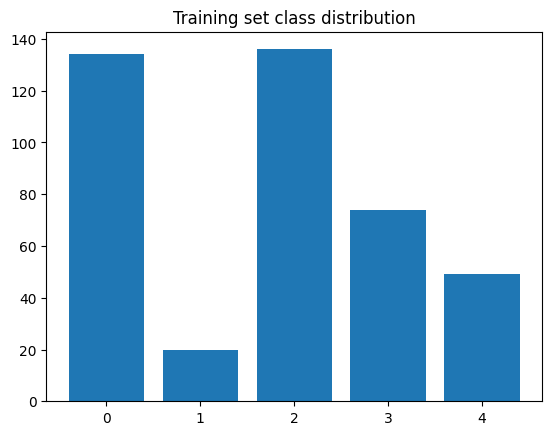

In [29]:
# Train data class distribution

df_train = labels_training[['Retinopathy grade','Image name']].groupby('Retinopathy grade').count().reset_index()
plt.bar(df_train['Retinopathy grade'], df_train['Image name'])
plt.title('Training set class distribution')
plt.show()

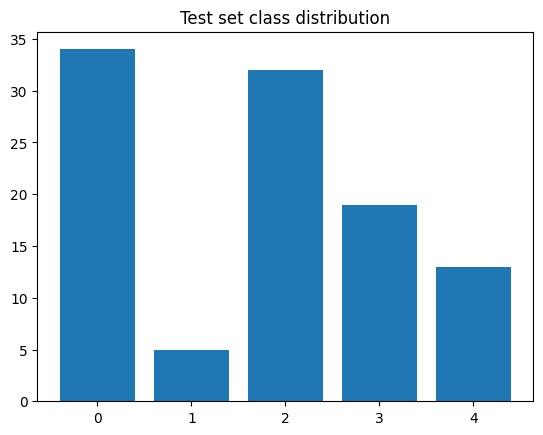

In [30]:
# Test data class distribution

df_test = labels_testing[['Retinopathy grade','Image name']].groupby('Retinopathy grade').count().reset_index()
plt.bar(df_test['Retinopathy grade'], df_test['Image name'])

plt.title('Test set class distribution')
plt.show()

# KMeans Clustering

In [8]:
import os
import glob
import numpy as np
from skimage.io import imread

# Define the path to the directory containing the image files
source_path = "Disease Grading/1. Original Images/a. Training Set"

# Define the path to the training set directory
train_dir = "Disease Grading/1. Original Images/train"

# Create the training set directory if it doesn't exist
os.makedirs(train_dir, exist_ok=True)

# Get a list of all image files in the source directory
image_files = glob.glob(os.path.join(source_path, "*.jpg"))

len(image_files)

413

In [9]:
# Read the images and convert them to a NumPy array
# data = np.zeros((len(image_files[0]), 28 * 28))
data = []
for image_file in image_files:
    img = imread(image_file)
    img = np.resize(img, (224,300)).flatten()
    data.append(img)

# Define the label array
label = labels_training["Retinopathy grade"].values

In [10]:
data[0].shape[0]

67200

In [13]:
pixel_cols = [f"pixel_{i}" for i in range(1,data[0].shape[0]+1)]
len(pixel_cols)

67200

In [14]:
df = pd.DataFrame(data, columns =[f"pixel_{i}" for i in range(1,data[0].shape[0]+1)])

In [15]:
df.describe()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_67191,pixel_67192,pixel_67193,pixel_67194,pixel_67195,pixel_67196,pixel_67197,pixel_67198,pixel_67199,pixel_67200
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,0.249395,0.048426,0.426150,0.249395,0.048426,0.426150,0.249395,0.048426,0.426150,0.249395,...,1.757869,4.840194,2.196126,1.767554,4.888620,2.200969,1.789346,4.726392,2.292978,1.631961
std,1.109658,0.214925,1.418496,1.109658,0.214925,1.418496,1.109658,0.214925,1.418496,1.109658,...,2.529336,4.168610,2.681795,2.544595,4.191669,2.685054,2.563122,4.097739,2.727756,2.392372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,1.000000,0.000000,5.000000,1.000000,0.000000,5.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,9.000000,5.000000,2.000000,9.000000,5.000000,2.000000,8.000000,5.000000,2.000000
max,9.000000,1.000000,9.000000,9.000000,1.000000,9.000000,9.000000,1.000000,9.000000,9.000000,...,10.000000,18.000000,9.000000,10.000000,18.000000,9.000000,10.000000,18.000000,10.000000,8.000000


In [16]:
# Normalising

df = df/255

In [17]:
# PCA dimension reduction

from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA()

#fit the data
transformed_data = model.fit_transform(df)

# transform the data
transformed_data_df = pd.DataFrame(transformed_data, columns = [f"PCA_{i}" for i in range(1,model.n_components_+1)])
# transformed_data_df['cluster_labels'] = df['cluster_labels'].values

display(transformed_data_df.shape)
display(model.n_components_)

(413, 413)

413

In [18]:
transformed_data_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_404,PCA_405,PCA_406,PCA_407,PCA_408,PCA_409,PCA_410,PCA_411,PCA_412,PCA_413
0,-19.992065,5.477455,2.208153,-2.027244,5.554068,0.646737,-0.141480,-0.197916,0.301872,-0.824333,...,-0.018633,0.028349,-0.018281,0.016000,5.421093e-15,5.385301e-15,8.420648e-17,1.295391e-17,3.783994e-18,7.852009e-19
1,21.236072,-6.341935,4.133559,-3.643142,1.414589,-0.356106,0.827924,0.571791,-1.408455,2.047964,...,-0.036621,-0.006502,-0.005351,-0.031184,5.421093e-15,5.385301e-15,8.420648e-17,1.295391e-17,3.783994e-18,7.852009e-19
2,18.253075,-5.434599,-1.211880,4.161007,-1.919659,-3.285462,-1.236961,0.314739,0.719509,0.033295,...,0.016848,-0.007449,0.025489,0.023181,5.421093e-15,5.385301e-15,8.420648e-17,1.295391e-17,3.783994e-18,7.852009e-19
3,26.651775,1.837350,3.854110,-0.922174,0.037508,-3.029913,-0.429355,0.914593,-0.254354,0.578895,...,0.115788,-0.038191,0.025274,0.049875,5.421093e-15,5.385301e-15,8.420648e-17,1.295391e-17,3.783994e-18,7.852009e-19
4,-1.761450,12.961228,0.806542,-1.919374,-2.375329,0.290940,-0.328863,0.255215,0.791844,-0.401490,...,0.015897,0.032423,-0.015826,-0.010939,5.421093e-15,5.385301e-15,8.420648e-17,1.295391e-17,3.783994e-18,7.852009e-19


# Binary Classification

In [19]:
from sklearn.cluster import KMeans

# Find clusters
k = 2
kmeans_b = KMeans(n_clusters=k, random_state=0)
kmeans_binary_result = kmeans_b.fit(transformed_data_df)

df['binary_cluster_labels'] = kmeans_binary_result.labels_

/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
labels_binary = labels_training.copy()

labels_binary['Retinopathy grade'].replace([1,2,3,4],1,inplace=True)
labels_binary['Retinopathy grade'].unique()

array([1, 0])

In [21]:
from sklearn.metrics import classification_report


print(classification_report(labels_binary['Retinopathy grade'],df['binary_cluster_labels']))

              precision    recall  f1-score   support

           0       0.32      0.47      0.38       134
           1       0.68      0.53      0.59       279

    accuracy                           0.51       413
   macro avg       0.50      0.50      0.49       413
weighted avg       0.56      0.51      0.53       413



## Check on test

In [25]:
# Define the path to the directory containing the image files
source_path = "Disease Grading/1. Original Images/b. Testing Set"

# Define the path to the training set directory
test_dir = "Disease Grading/1. Original Images/test"

# Create the training set directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Get a list of all image files in the source directory
image_files_test = glob.glob(os.path.join(source_path, "*.jpg"))


# Read the images and convert them to a NumPy array
data_test = []
for image_file in image_files_test:
    img = imread(image_file)
    img = np.resize(img, (224,300)).flatten()
    data_test.append(img)

# Define the label array
label_test = labels_testing["Retinopathy grade"].values

In [26]:
data_test[0].shape

(67200,)

In [27]:
# Test df and normalising

df_test = pd.DataFrame(data_test, columns =[f"pixel_{i}" for i in range(1,data_test[0].shape[0]+1)])
df_test = df_test/255

In [28]:
# PCA transform

transformed_test = model.transform(df_test)
transformed_test_df = pd.DataFrame(transformed_test, columns = [f"PCA_{i}" for i in range(1,model.n_components_+1)])
transformed_test_df.shape

(103, 413)

In [29]:
label_test_binary = labels_testing.copy()

label_test_binary["Retinopathy grade"].replace([1,2,3,4],1,inplace=True)
label_test_binary["Retinopathy grade"].unique()

array([1, 0])

In [30]:
# Kmeans predict

df_test['bin_cluster_labels'] = kmeans_b.predict(transformed_test_df)
df_test

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_67192,pixel_67193,pixel_67194,pixel_67195,pixel_67196,pixel_67197,pixel_67198,pixel_67199,pixel_67200,bin_cluster_labels
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.019608,0.003922,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.019608,0.023529,0.035294,0.019608,0.023529,0.035294,0.019608,0.015686,0
3,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,...,0.043137,0.027451,0.031373,0.043137,0.027451,0.031373,0.043137,0.027451,0.031373,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.019608,0.023529,0.035294,0.019608,0.023529,0.035294,0.019608,0.015686,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.023529,0.000000,0.035294,0.023529,0.000000,0.035294,0.023529,0.000000,1
99,0.011765,0.003922,0.007843,0.011765,0.003922,0.007843,0.011765,0.003922,0.007843,0.011765,...,0.035294,0.019608,0.015686,0.035294,0.019608,0.015686,0.035294,0.019608,0.015686,0
100,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,...,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.015686,1
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.011765,0.007843,0.000000,0


In [31]:
print(classification_report(label_test_binary["Retinopathy grade"],df_test['bin_cluster_labels']))

              precision    recall  f1-score   support

           0       0.34      0.47      0.40        34
           1       0.68      0.55      0.61        69

    accuracy                           0.52       103
   macro avg       0.51      0.51      0.50       103
weighted avg       0.57      0.52      0.54       103



Model as good as random guessing with an accuracy of 50%

# Cluster in 5 Categories

In [35]:
from sklearn.cluster import KMeans

# Find clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_result = kmeans.fit(transformed_data_df)

df['c5_cluster_labels'] = kmeans_result.labels_

/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_67193,pixel_67194,pixel_67195,pixel_67196,pixel_67197,pixel_67198,pixel_67199,pixel_67200,binary_cluster_labels,c5_cluster_labels
0,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,...,0.003922,0.007843,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0,3
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2
2,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.019608,...,0.027451,0.019608,0.062745,0.031373,0.023529,0.062745,0.031373,0.023529,1,2
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.023529,0.035294,0.019608,0.023529,0.035294,0.019608,0.023529,1,2
409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.031373,0.000000,0.000000,0.023529,0.003922,0.000000,1,2
410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023529,0.019608,0.000000,0.023529,0.019608,0.000000,0.015686,0,4
411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023529,0.000000,0.035294,0.023529,0.000000,0.035294,0.023529,0.000000,0,4


In [37]:
from sklearn.metrics import classification_report

print(classification_report(labels_training['Retinopathy grade'],df['c5_cluster_labels']))

              precision    recall  f1-score   support

           0       0.32      0.20      0.25       134
           1       0.00      0.00      0.00        20
           2       0.38      0.29      0.33       136
           3       0.22      0.19      0.20        74
           4       0.11      0.24      0.15        49

    accuracy                           0.22       413
   macro avg       0.20      0.18      0.18       413
weighted avg       0.28      0.22      0.24       413



In [38]:
labels_training['Retinopathy grade'].value_counts(),df['c5_cluster_labels'].value_counts()

(Retinopathy grade
 2    136
 0    134
 3     74
 4     49
 1     20
 Name: count, dtype: int64,
 c5_cluster_labels
 4    113
 2    102
 0     85
 3     65
 1     48
 Name: count, dtype: int64)

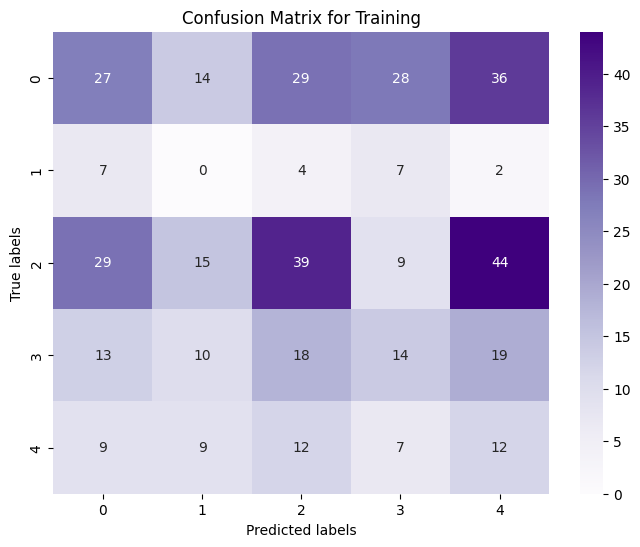

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(labels_training['Retinopathy grade'], df['c5_cluster_labels'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Training")
plt.show()

## Check on Test

In [43]:
transformed_test_df.shape

(103, 413)

In [44]:
# Kmeans

df_test['c5_cluster_labels'] = kmeans.predict(transformed_test_df)
df_test

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_67192,pixel_67193,pixel_67194,pixel_67195,pixel_67196,pixel_67197,pixel_67198,pixel_67199,pixel_67200,c5_cluster_labels
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.019608,0.003922,0.000000,4
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,4
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.019608,0.023529,0.035294,0.019608,0.023529,0.035294,0.019608,0.015686,4
3,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,...,0.043137,0.027451,0.031373,0.043137,0.027451,0.031373,0.043137,0.027451,0.031373,2
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.019608,0.023529,0.035294,0.019608,0.023529,0.035294,0.019608,0.015686,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.023529,0.000000,0.035294,0.023529,0.000000,0.035294,0.023529,0.000000,2
99,0.011765,0.003922,0.007843,0.011765,0.003922,0.007843,0.011765,0.003922,0.007843,0.011765,...,0.035294,0.019608,0.015686,0.035294,0.019608,0.015686,0.035294,0.019608,0.015686,4
100,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,...,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.023529,0.015686,1
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.003922,0.007843,0.019608,0.003922,0.007843,0.011765,0.007843,0.000000,3


In [45]:
print(classification_report(labels_testing['Retinopathy grade'],df_test['c5_cluster_labels']))

              precision    recall  f1-score   support

           0       0.50      0.26      0.35        34
           1       0.25      0.40      0.31         5
           2       0.27      0.25      0.26        32
           3       0.11      0.05      0.07        19
           4       0.24      0.69      0.35        13

    accuracy                           0.28       103
   macro avg       0.27      0.33      0.27       103
weighted avg       0.31      0.28      0.27       103



Model has an accuracy of 28% which is a little better than random guessing(20% for each class).

In [46]:
labels_testing['Retinopathy grade'].value_counts(),df_test['c5_cluster_labels'].value_counts()

(Retinopathy grade
 0    34
 2    32
 3    19
 4    13
 1     5
 Name: count, dtype: int64,
 c5_cluster_labels
 4    38
 2    30
 0    18
 3     9
 1     8
 Name: count, dtype: int64)

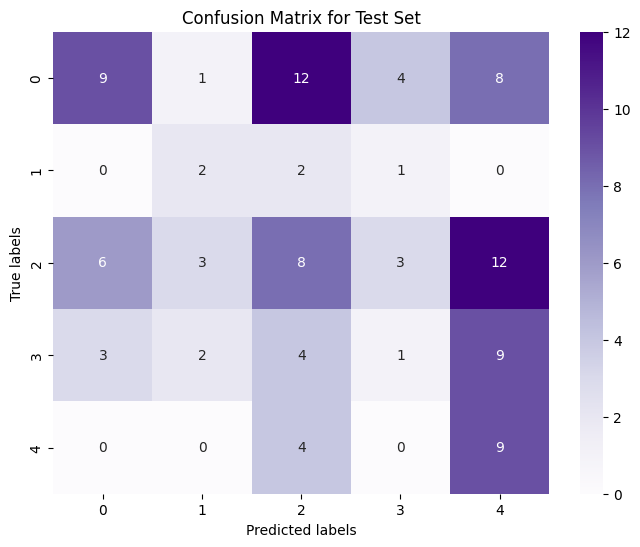

In [47]:
# Compute confusion matrix
cm = confusion_matrix(labels_testing['Retinopathy grade'], df_test['c5_cluster_labels'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Test Set")
plt.show()

Model heavily predicting class 0 and 2 over others due to class imbalance in the dataset.